In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython.display import Image
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns

import missingno as msno #to visualize missing data

from imblearn.over_sampling import SMOTE
import itertools


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix,plot_roc_curve,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder #label encoding for categorical columns

#pyo.init_notebook_mode()

In [2]:
file_path1 = r'D:\Learning\Data\CredirCardApproval\application_record.csv'
file_path2 = r'D:\Learning\Data\CredirCardApproval\credit_record.csv'

In [3]:
application_record_df = pd.read_csv(file_path1)
credit_score_df = pd.read_csv(file_path2)

In [4]:
application_record_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
credit_score_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
application_record_df_original = application_record_df.copy()
credit_score_df_original = credit_score_df.copy()

In [7]:
application_record_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [8]:
#renaming columns 
application_record_df.rename(columns={"CODE_GENDER":"Gender","FLAG_OWN_CAR":"Own_Car","FLAG_OWN_REALTY":"Own_Realty",
                     "CNT_CHILDREN":"Children_Count","AMT_INCOME_TOTAL":"Income","NAME_EDUCATION_TYPE":"Education",
                     "NAME_FAMILY_STATUS":"Family_Status","NAME_HOUSING_TYPE":"Housing_Type","DAYS_BIRTH":"Birthday",
                     "DAYS_EMPLOYED":"Employment_Date","FLAG_MOBIL":"Own_Mobile","FLAG_WORK_PHONE":"Own_Work_Phone",
                     "FLAG_PHONE":"Own_Phone","FLAG_EMAIL":"Own_Email","CNT_FAM_MEMBERS":"Family_Member_Count",
                    "NAME_INCOME_TYPE":"Income_Type"},inplace=True)

In [9]:
application_record_df.columns

Index(['ID', 'Gender', 'Own_Car', 'Own_Realty', 'Children_Count', 'Income',
       'Income_Type', 'Education', 'Family_Status', 'Housing_Type', 'Birthday',
       'Employment_Date', 'Own_Mobile', 'Own_Work_Phone', 'Own_Phone',
       'Own_Email', 'OCCUPATION_TYPE', 'Family_Member_Count'],
      dtype='object')

__Checking for duplicate records__

In [10]:
print('Application Data')
print('Application record data: rows {} & columns {} '.format(application_record_df.shape[0], application_record_df.shape[1]))
print('No of unique ids in the application data: ',len(application_record_df.ID.unique()))
print('\nCredit Card Data')
print('Credic Card record data: rows {} & columns {} '.format(credit_score_df.shape[0], credit_score_df.shape[1]))
print('No of unique ids in the Credit Card data: ',len(credit_score_df.ID.unique()))

Application Data
Application record data: rows 438557 & columns 18 
No of unique ids in the application data:  438510

Credit Card Data
Credic Card record data: rows 1048575 & columns 3 
No of unique ids in the Credit Card data:  45985


In [11]:
# Checking for the common records in Application and Credit score data 
common_records = len(set(application_record_df.ID).intersection(credit_score_df.ID))
print('{} records are common in Application and Credit Card data'.format(common_records))

36457 records are common in Application and Credit Card data


__Observations__
- unique id counts and row counts are not equal
- Applications and Credi score data contains duplicate records 
- No of unique ids are not same in Application & Credit card data 
- Maximim of the applicants details not available in Credit Score data
- Total no of common records is 36457

__Checking for Missing values__

In [12]:
application_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   Gender               438557 non-null  object 
 2   Own_Car              438557 non-null  object 
 3   Own_Realty           438557 non-null  object 
 4   Children_Count       438557 non-null  int64  
 5   Income               438557 non-null  float64
 6   Income_Type          438557 non-null  object 
 7   Education            438557 non-null  object 
 8   Family_Status        438557 non-null  object 
 9   Housing_Type         438557 non-null  object 
 10  Birthday             438557 non-null  int64  
 11  Employment_Date      438557 non-null  int64  
 12  Own_Mobile           438557 non-null  int64  
 13  Own_Work_Phone       438557 non-null  int64  
 14  Own_Phone            438557 non-null  int64  
 15  Own_Email        

In [13]:
application_record_df.isnull().sum()

ID                          0
Gender                      0
Own_Car                     0
Own_Realty                  0
Children_Count              0
Income                      0
Income_Type                 0
Education                   0
Family_Status               0
Housing_Type                0
Birthday                    0
Employment_Date             0
Own_Mobile                  0
Own_Work_Phone              0
Own_Phone                   0
Own_Email                   0
OCCUPATION_TYPE        134203
Family_Member_Count         0
dtype: int64

In [14]:
credit_score_df.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [15]:
percentage = application_record_df['OCCUPATION_TYPE'].isnull().sum()/application_record_df.shape[0]*100

In [16]:
print('{:.4f} % is nan in Occupation_type feature'.format(percentage))

30.6010 % is nan in Occupation_type feature


In [17]:
application_record_df.OCCUPATION_TYPE.unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [18]:
application_record_df.fillna('Others', inplace=True)

In [19]:
application_record_df.OCCUPATION_TYPE.unique()

array(['Others', 'Security staff', 'Sales staff', 'Accountants',
       'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff'], dtype=object)

__Observation__
- Occupation_Type in Application data feature contains NAN values
- 30 % records are having NAN values
- These values are assinged with Occupation_Type as 'Other'

__Unique Value Counts__

In [20]:
# Defining function to check nuique values
def unique_counts(data):
    df = data
    return pd.DataFrame([(col, len(df[col].unique()), df[col].dtype) for col in df.columns], 
                             columns=['Column_Name', 'Unique_Count', 'Dtype']).sort_values(by=['Unique_Count'])

In [21]:
unique_counts(application_record_df)

,Column_Name,Unique_Count,Dtype
12,Own_Mobile,1,int64
1,Gender,2,object
2,Own_Car,2,object
3,Own_Realty,2,object
15,Own_Email,2,int64
14,Own_Phone,2,int64
13,Own_Work_Phone,2,int64
8,Family_Status,5,object
6,Income_Type,5,object
7,Education,5,object


In [22]:
unique_counts(credit_score_df)

,Column_Name,Unique_Count,Dtype
2,STATUS,8,object
1,MONTHS_BALANCE,61,int64
0,ID,45985,int64


__Data Visualization__

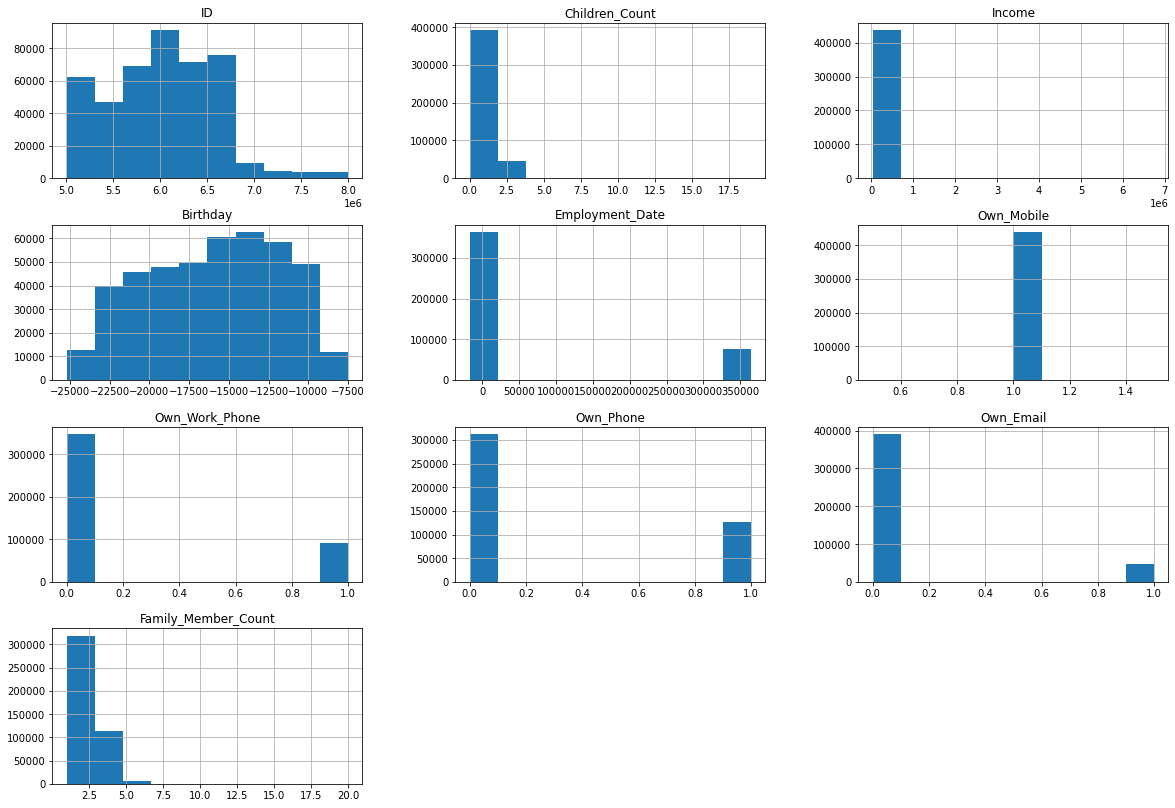

In [23]:
# Checking the distribution on fetures
application_record_df.hist()
fig=plt.gcf()
fig.set_size_inches(20,14);

In [24]:
application_record_df.describe()

,ID,Children_Count,Income,Birthday,Employment_Date,Own_Mobile,Own_Work_Phone,Own_Phone,Own_Email,Family_Member_Count
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


__Observations__
- Numerical features contains outliers

#### Data visualization Categorical variables

In [25]:
cat_columns = application_record_df.select_dtypes(['object']).columns

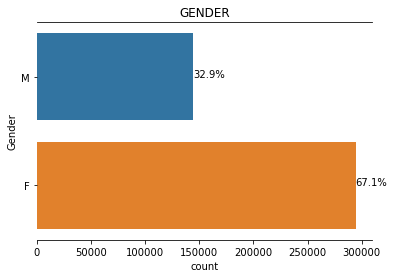

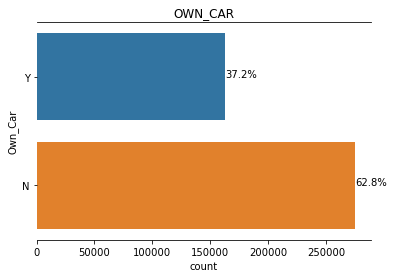

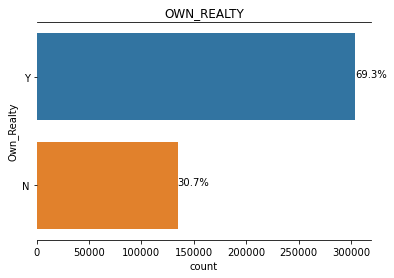

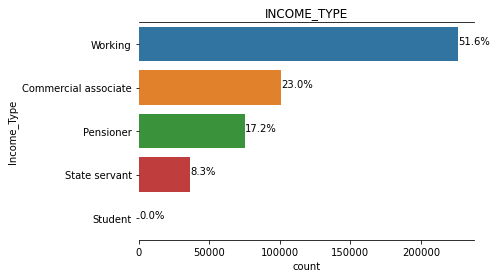

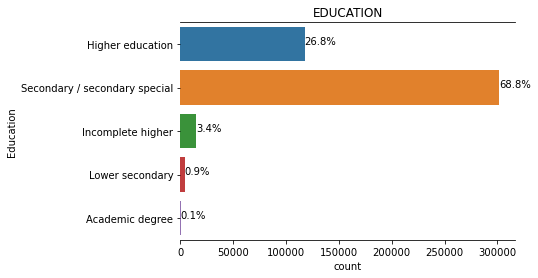

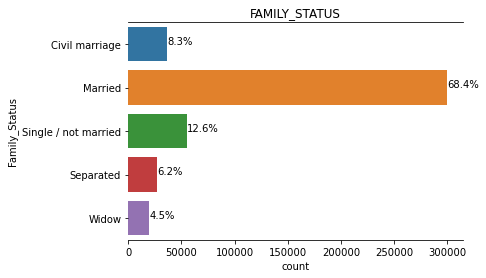

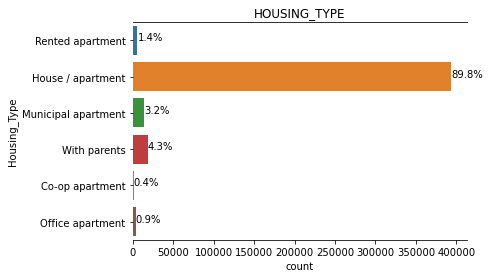

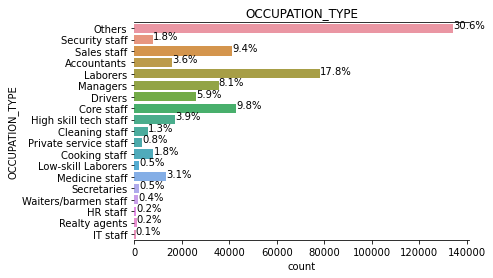

In [26]:
for col in cat_columns:
    ax = sns.countplot(y=col, data=application_record_df)
    sns.despine(top=False,right=True,left=True)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(application_record_df))
        x = p.get_x() + p.get_width()+0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.title(col.upper())
    plt.show()

In [27]:
unique_counts(application_record_df[cat_columns])

,Column_Name,Unique_Count,Dtype
0,Gender,2,object
1,Own_Car,2,object
2,Own_Realty,2,object
3,Income_Type,5,object
4,Education,5,object
5,Family_Status,5,object
6,Housing_Type,6,object
7,OCCUPATION_TYPE,19,object


In [28]:
# Obsrvations

### Data Preprocessing & Feture Engineering

In [29]:
# Droping the duplicate records from Application data 
application_record_df = application_record_df.drop_duplicates('ID', keep='last')

In [30]:
# calculating the open month using Credit card data
open_month = pd.DataFrame(credit_score_df.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
open_month = open_month.rename(columns={'MONTHS_BALANCE':'Begin_month'})

In [31]:
# merging the data 
customer_data = pd.merge(application_record_df, open_month, on='ID', how='left')

In [32]:
# Converting categorical features into numerical
customer_data['Gender'] = customer_data['Gender'].replace(['M','F'], [0,1])
customer_data["Own_Car"] = customer_data["Own_Car"].replace(["Y","N"],[1,0])
customer_data["Own_Realty"] = customer_data["Own_Realty"].replace(["Y","N"],[1,0])

In [33]:
# additional information
customer_data["Is_Working"] = customer_data["Income_Type"].replace(["Working","Commercial associate","State servant",
                                                                    "Pensioner","Student"],[1,1,1,0,0])
customer_data["In_Relationship"] = customer_data["Family_Status"].replace(["Civil marriage","Married","Single / not married",
                                                                          "Separated","Widow"],[1,1,0,0,0])

In [34]:
# Ordinal encoding feature Income_Type
income_Type ={ 'Working': 3, 'Commercial associate': 2, 'Pensioner': 4, 'State servant': 1,'Student': 5}
customer_data.Income_Type = customer_data['Income_Type'].map(income_Type)

# Ordinal encoding feature Education 
education_type = {'Higher education': 1, 'Secondary / secondary special': 2,
       'Incomplete higher': 3, 'Lower secondary': 4, 'Academic degree': 5}
customer_data.Education = customer_data['Education'].map(education_type)

# Ordinal encoding feature Family Status
family_status = {'Civil marriage': 1, 'Married': 1, 'Single / not married': 2, 'Separated': 3,
       'Widow':5 }
customer_data.Family_Status = customer_data['Family_Status'].map(family_status)

# Ordinal encoding feature Housing Type
housing_type = {'Rented apartment':3 , 'House / apartment': 1, 'Municipal apartment':2,
       'With parents':5, 'Co-op apartment': 4, 'Office apartment': 6}
customer_data.Housing_Type = customer_data['Housing_Type'].map(housing_type)

# Ordinal encoding feature Occupation Type
occupation_type = {'Others': 19, 'Security staff': 13, 'Sales staff': 14, 'Accountants': 6,
       'Laborers': 16, 'Managers': 1, 'Drivers': 15, 'Core staff': 7,
       'High skill tech staff': 2, 'Cleaning staff': 17, 'Private service staff': 3,
       'Cooking staff': 11, 'Low-skill Laborers': 12, 'Medicine staff': 8,
       'Secretaries': 4, 'Waiters/barmen staff': 18, 'HR staff': 5, 'Realty agents': 9,
       'IT staff': 10}
customer_data.OCCUPATION_TYPE = customer_data['OCCUPATION_TYPE'].map(occupation_type)

In [35]:
# additional information
customer_data['Household_size'] = customer_data['Children_Count'] + customer_data['In_Relationship'].apply(lambda x: 2 if x==1 else 1)
customer_data['Age'] = round((customer_data.Birthday/365)*-1)
customer_data['Experience'] = (customer_data.Employment_Date/365).apply(lambda x: x*-1 if x<0 else x) 

#Droping columns 
customer_data=customer_data.drop(columns=['Employment_Date','Birthday','Children_Count'])

In [36]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438509
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   Gender               438510 non-null  int64  
 2   Own_Car              438510 non-null  int64  
 3   Own_Realty           438510 non-null  int64  
 4   Income               438510 non-null  float64
 5   Income_Type          438510 non-null  int64  
 6   Education            438510 non-null  int64  
 7   Family_Status        438510 non-null  int64  
 8   Housing_Type         438510 non-null  int64  
 9   Own_Mobile           438510 non-null  int64  
 10  Own_Work_Phone       438510 non-null  int64  
 11  Own_Phone            438510 non-null  int64  
 12  Own_Email            438510 non-null  int64  
 13  OCCUPATION_TYPE      438510 non-null  int64  
 14  Family_Member_Count  438510 non-null  float64
 15  Begin_month      

In [37]:
customer_data.head()

,ID,Gender,Own_Car,Own_Realty,Income,Income_Type,Education,Family_Status,Housing_Type,Own_Mobile,...,Own_Phone,Own_Email,OCCUPATION_TYPE,Family_Member_Count,Begin_month,Is_Working,In_Relationship,Household_size,Age,Experience
0,5008804,0,1,1,427500.0,3,1,1,3,1,...,0,0,19,2.0,-15.0,1,1,2,33.0,12.443836
1,5008805,0,1,1,427500.0,3,1,1,3,1,...,0,0,19,2.0,-14.0,1,1,2,33.0,12.443836
2,5008806,0,1,1,112500.0,3,2,1,1,1,...,0,0,13,2.0,-29.0,1,1,2,59.0,3.106849
3,5008808,1,0,1,270000.0,2,2,2,1,1,...,1,1,14,1.0,-4.0,1,0,1,52.0,8.358904
4,5008809,1,0,1,270000.0,2,2,2,1,1,...,1,1,14,1.0,-26.0,1,0,1,52.0,8.358904


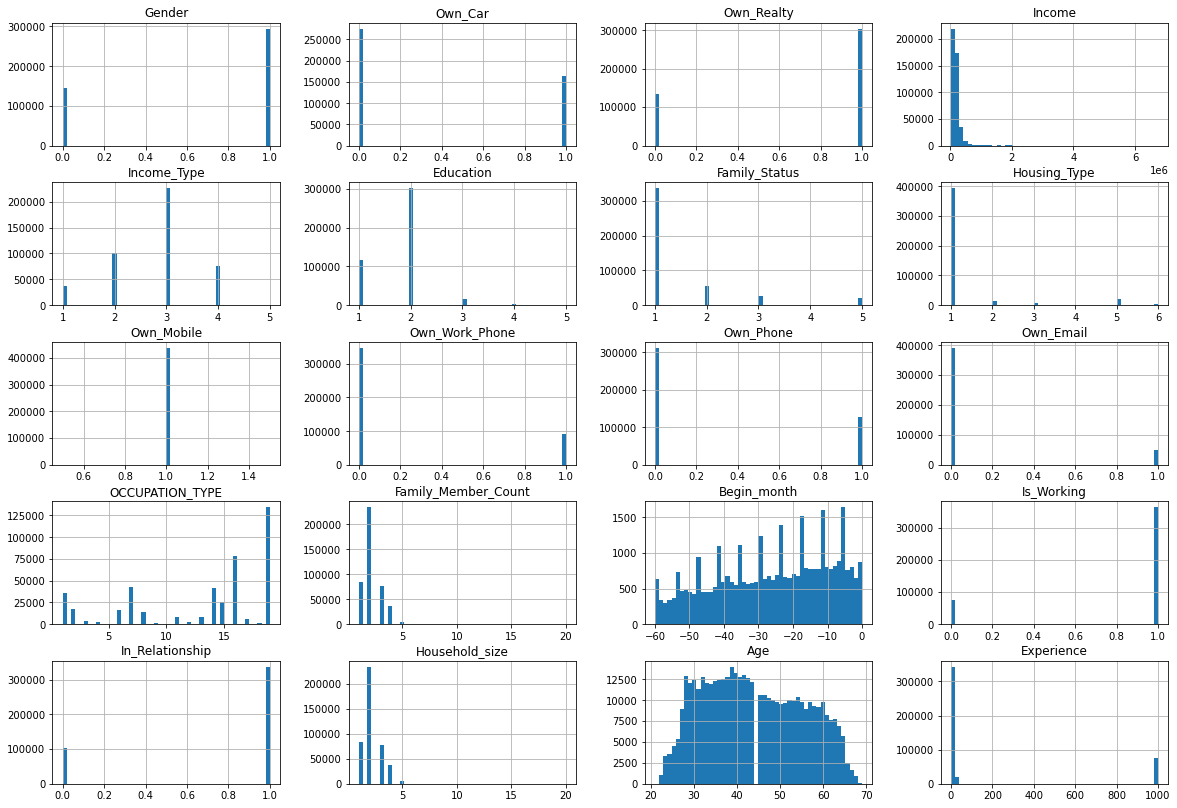

In [38]:
# Excluding the ID columns
customer_data.iloc[:,1:].hist(bins=50)
fig=plt.gcf()
fig.set_size_inches(20,14);

In [39]:
# Own Mobile is a constaint feture, hence droping it
customer_data = customer_data.drop(labels='Own_Mobile', axis=1)

In [40]:
# Analysing numerical features for outliers based on EDA 
other_numerical_cols = ["Income","Age","Experience","Household_size"]

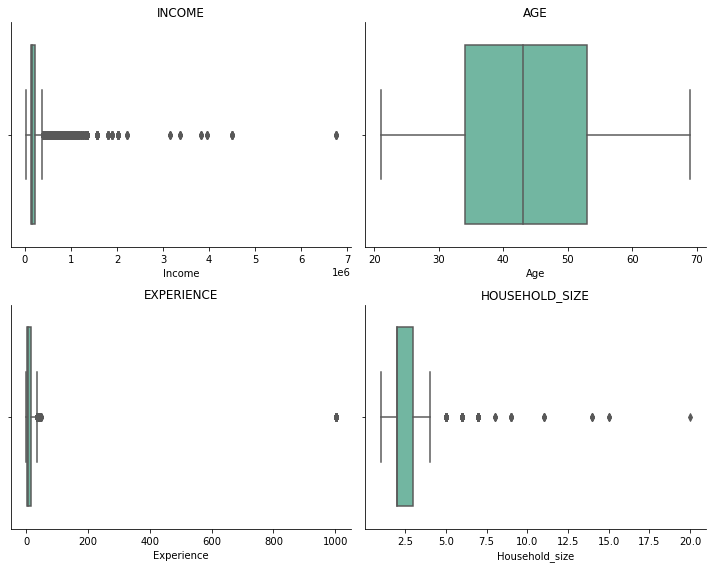

In [41]:
plt.figure(figsize=(10,8))

sns.set_palette(sns.color_palette("Set2", 4))

for i, variable in enumerate(other_numerical_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=customer_data[variable], data=customer_data)
    sns.despine(top=True,right=True,left=False) # to remove side line from graph
    plt.tight_layout()
    plt.title(variable.upper())

In [42]:
# Removing the outliers using IQR 
import scipy.stats as stats

customer_data_cleaned = customer_data.copy()

print(customer_data_cleaned.shape)
Q1 = customer_data_cleaned[other_numerical_cols].quantile(q=.25)
Q3 = customer_data_cleaned[other_numerical_cols].quantile(q=.75)
IQR = customer_data_cleaned[other_numerical_cols].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
customer_data_cleaned = customer_data_cleaned[~((customer_data_cleaned < (Q1-1.5*IQR)) | (customer_data_cleaned > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
customer_data_cleaned.shape

(438510, 20)


(339155, 20)

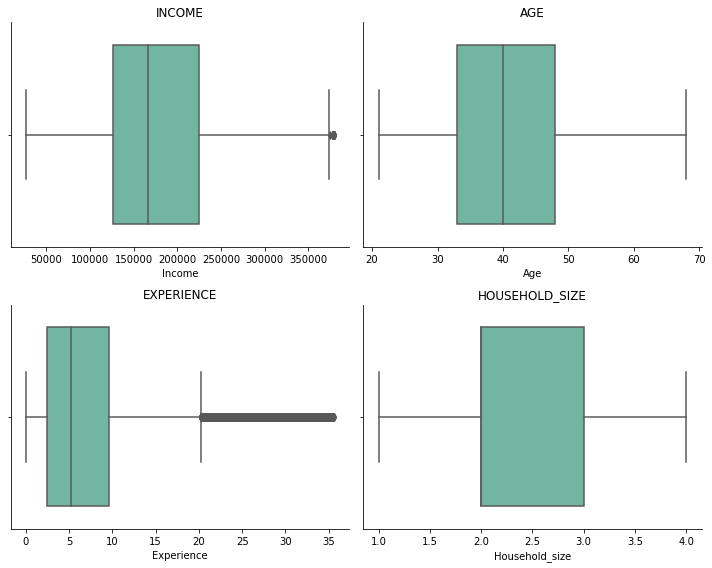

In [43]:
plt.figure(figsize=(10,8))

sns.set_palette(sns.color_palette("Set2", 4))

for i, variable in enumerate(other_numerical_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=variable, data=customer_data_cleaned)
    sns.despine(top=True,right=True,left=False) # to remove side line from graph
    plt.tight_layout()
    plt.title(variable.upper())

### Vintage Analysis 

In [44]:
record = credit_score_df.copy()
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [45]:
record['dep_value'] = None
record['dep_value'][record['STATUS']=='2']='Yes'
record['dep_value'][record['STATUS']=='3']='Yes'
record['dep_value'][record['STATUS']=='4']='Yes'
record['dep_value'][record['STATUS']=='5']='Yes'

record_count = record.groupby('ID').count()
record_count['dep_value'][record_count['dep_value'] > 0]='Yes' 
record_count['dep_value'][record_count['dep_value'] == 0]='No' 
record_count = record_count[['dep_value']]

In [46]:
# Data frame to analyze length of time since initial approval of credit card
# Shows number of past dues, paid off and no loan status.
grouped = record.groupby('ID')

pivot_tb = record.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb['window'] += 1 # Adding 1 since month starts at 0.

#Counting number of past dues, paid offs and no loans.
pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'C'].count(axis = 1)
pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:,0:61] == '0'].count(axis = 1)
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:,0:61] == '1'].count(axis = 1)
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:,0:61] == '2'].count(axis = 1)
pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:,0:61] == '3'].count(axis = 1)
pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:,0:61] == '4'].count(axis = 1)
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:,0:61] == '5'].count(axis = 1)
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'X'].count(axis = 1)
#Setting Id column to merge with app data.
pivot_tb['ID'] = pivot_tb.index

In [47]:
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,window,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,9,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,60,0,0,0,0,0,0,0,60,5001715


In [48]:
target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] = pivot_tb['pastdue_1-29'].values+ pivot_tb['pastdue_30-59'].values + pivot_tb['pastdue_60-89'].values +pivot_tb['pastdue_90-119'].values+pivot_tb['pastdue_120-149'].values +pivot_tb['pastdue_over_150'].values
target['no_loan'] = pivot_tb['no_loan'].values

customer_apps_1 = pd.merge(customer_data_cleaned,target, how = 'inner', on = 'ID')
customer_apps_2=pd.merge(customer_apps_1,record_count,how='inner',on='ID')

customer_apps_2['target']=customer_apps_2['dep_value']
customer_apps_2.loc[customer_apps_2['target']=='Yes','target']=1
customer_apps_2.loc[customer_apps_2['target']=='No','target']=0

customer_apps_2.drop(columns=["dep_value"],inplace=True)

In [49]:
customer_apps_2.head()

,ID,Gender,Own_Car,Own_Realty,Income,Income_Type,Education,Family_Status,Housing_Type,Own_Work_Phone,...,Begin_month,Is_Working,In_Relationship,Household_size,Age,Experience,paid_off,#_of_pastdues,no_loan,target
0,5008806,0,1,1,112500.0,3,2,1,1,0,...,-29.0,1,1,2,59.0,3.106849,7,7,16,0
1,5008808,1,0,1,270000.0,2,2,2,1,0,...,-4.0,1,0,1,52.0,8.358904,0,2,3,0
2,5008809,1,0,1,270000.0,2,2,2,1,0,...,-26.0,1,0,1,52.0,8.358904,0,0,5,0
3,5008810,1,0,1,270000.0,2,2,2,1,0,...,-26.0,1,0,1,52.0,8.358904,15,6,6,0
4,5008811,1,0,1,270000.0,2,2,2,1,0,...,-38.0,1,0,1,52.0,8.358904,27,6,6,0


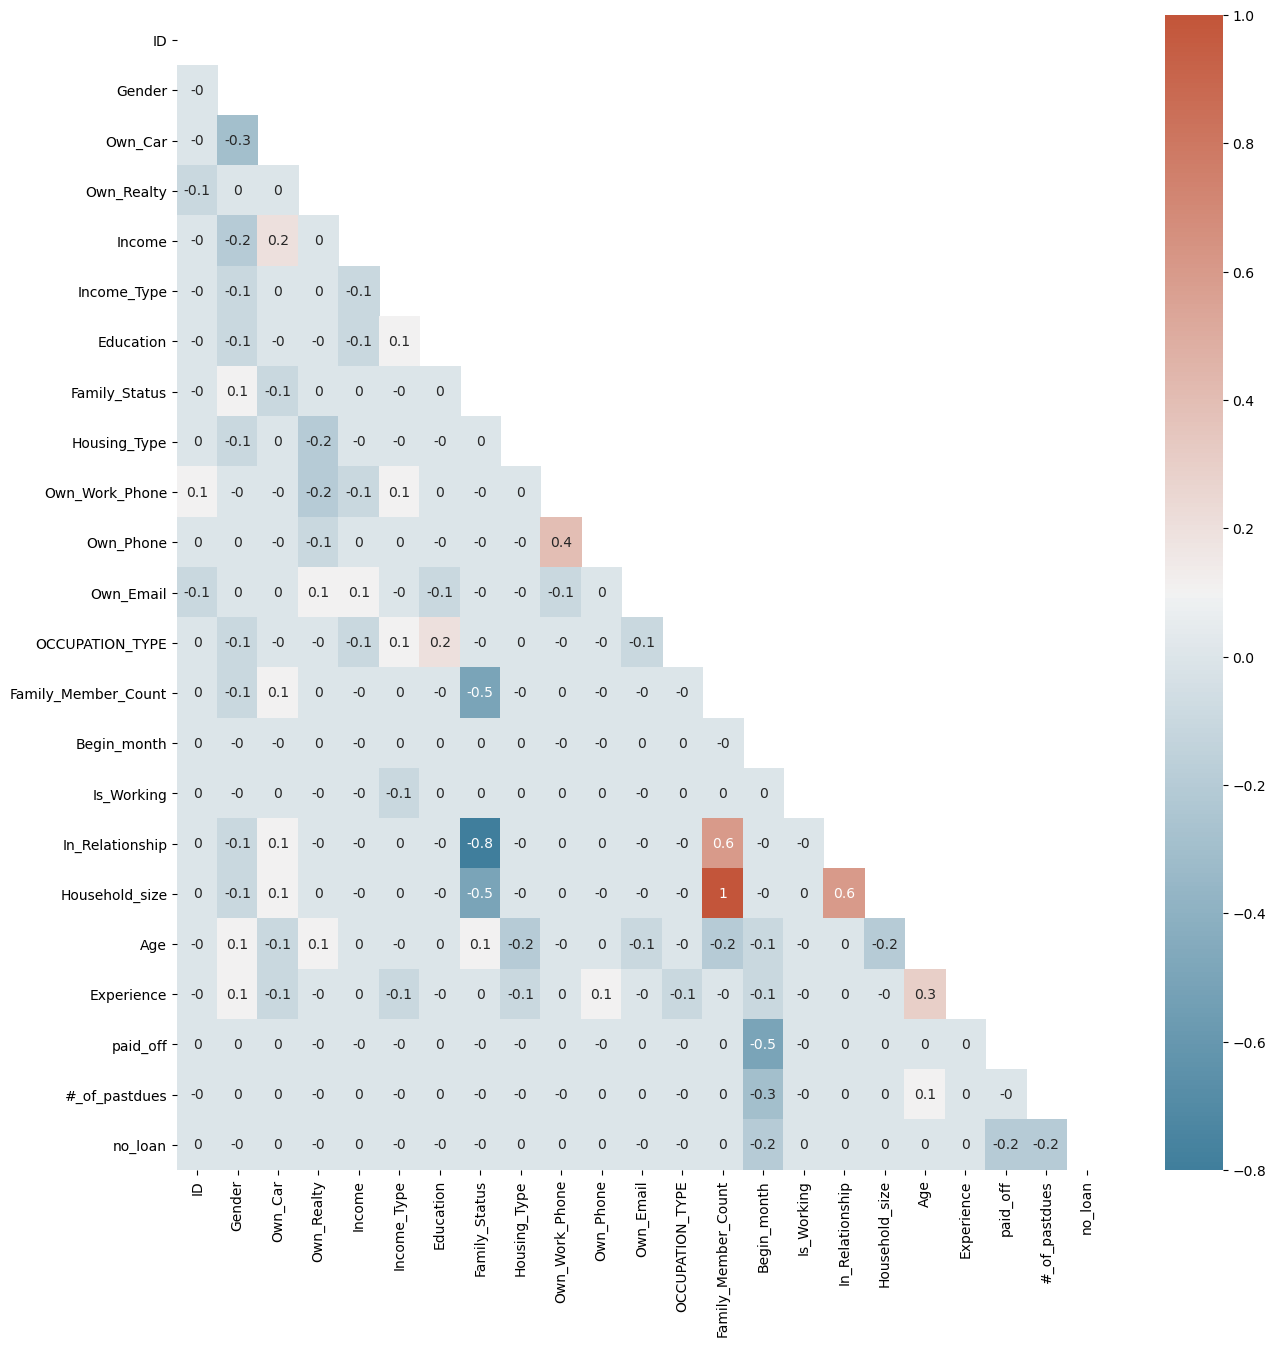

In [50]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = customer_apps_2.corr().round(1)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

In [51]:
# Droping the highly correlated feature family member count
customer_apps_2 = customer_apps_2.drop('Family_Member_Count',axis=1)

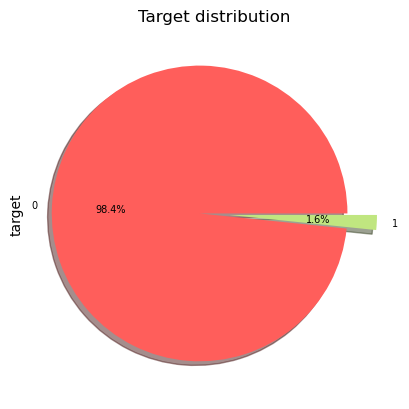

In [52]:
customer_apps_2['target'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, 
                                                  colors=['#FF5E5B', '#C0E680'],textprops = {'fontsize':7}).set_title("Target distribution")

plt.show();

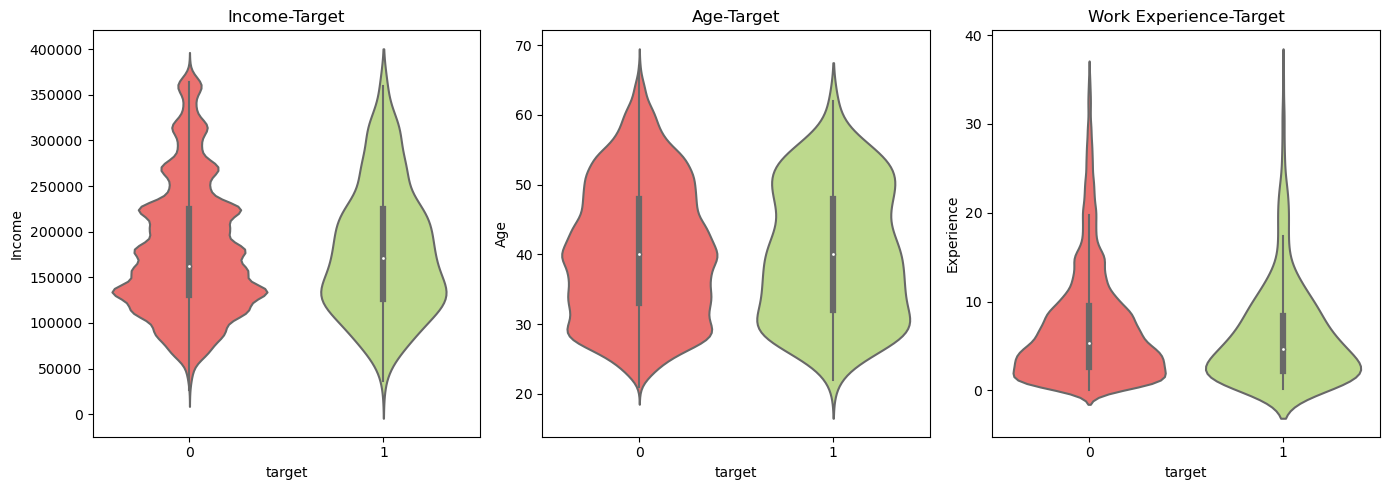

In [53]:
fig, axes = plt.subplots(1,3)

g1=sns.violinplot(x='target', y='Income', data=customer_apps_2,palette=['#FF5E5B', '#C0E680'], ax=axes[0])
g1.set_title("Income-Target")
g2=sns.violinplot(x='target', y='Age', data=customer_apps_2,palette=['#FF5E5B', '#C0E680'], ax=axes[1])
g2.set_title("Age-Target")
g3=sns.violinplot(x='target', y='Experience', data=customer_apps_2,palette=['#FF5E5B', '#C0E680'], ax=axes[2])
g3.set_title("Work Experience-Target")

fig.set_size_inches(14,5)

plt.tight_layout()

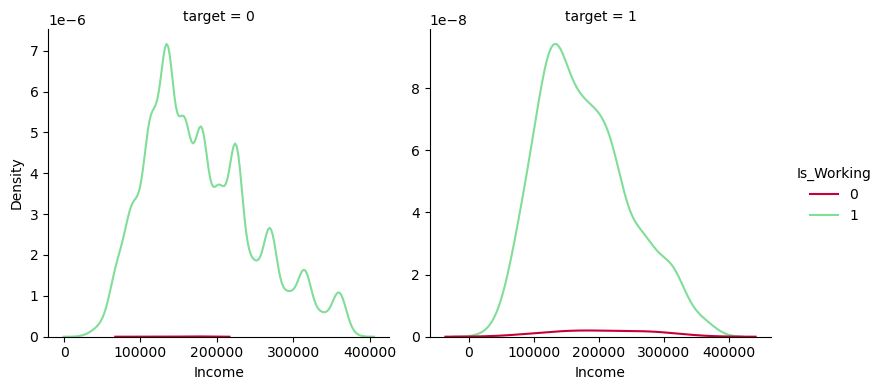

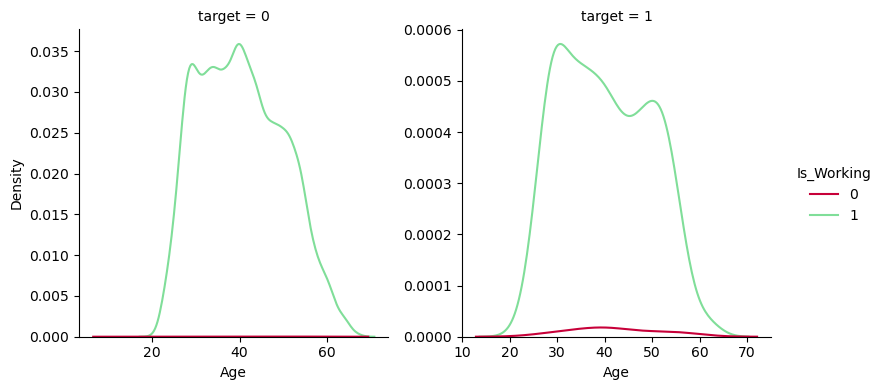

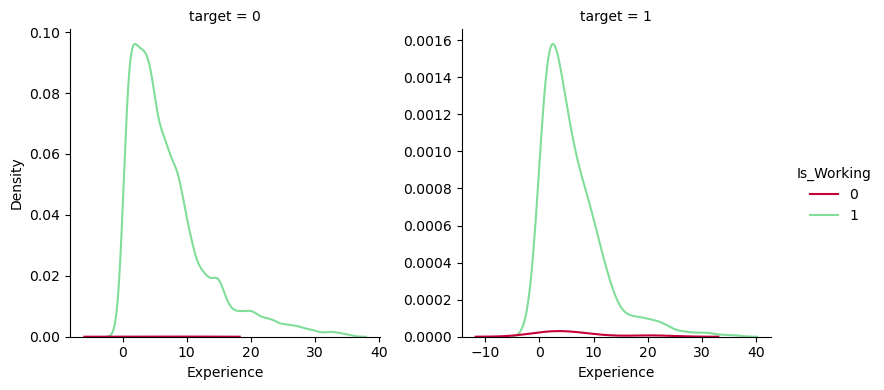

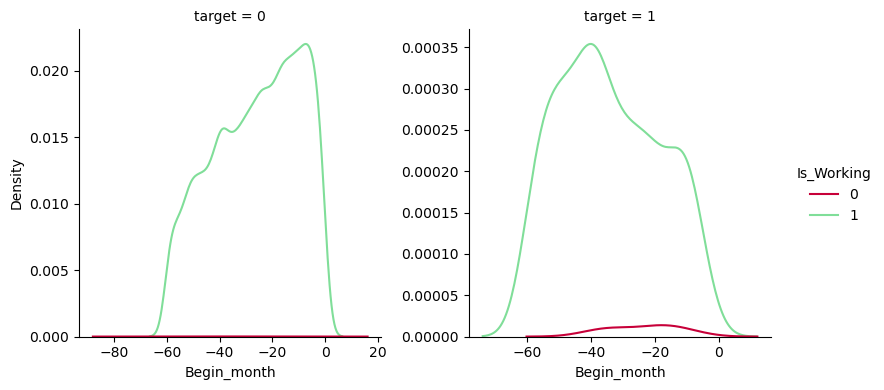

In [54]:
sns.displot(data=customer_apps_2, x='Income', hue="Is_Working", col='target', kind="kde", height=4, facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])
sns.displot(data=customer_apps_2, x='Age', hue="Is_Working", col='target', kind="kde", height=4, facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])
sns.displot(data=customer_apps_2, x='Experience', hue="Is_Working", col='target', kind="kde", height=4, facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])
sns.displot(data=customer_apps_2, x='Begin_month', hue="Is_Working", col='target', kind="kde", height=4, facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])

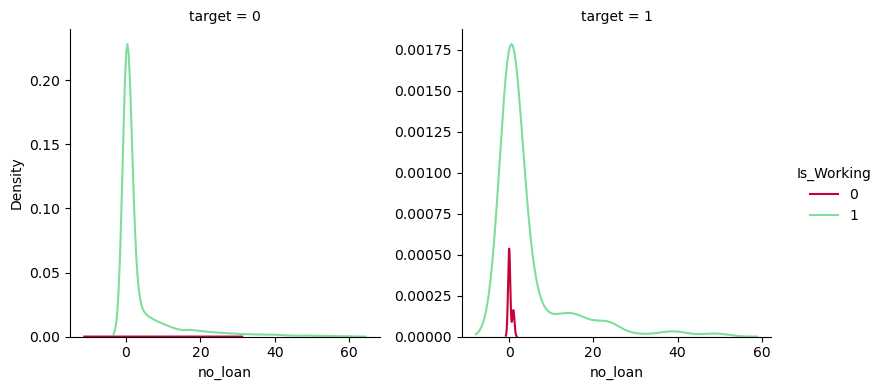

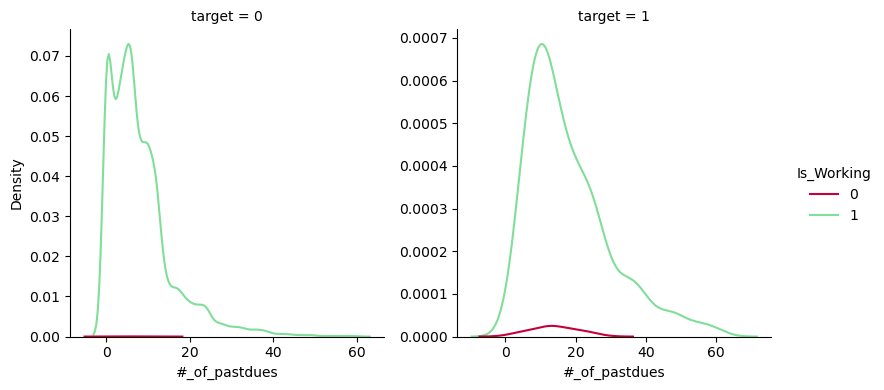

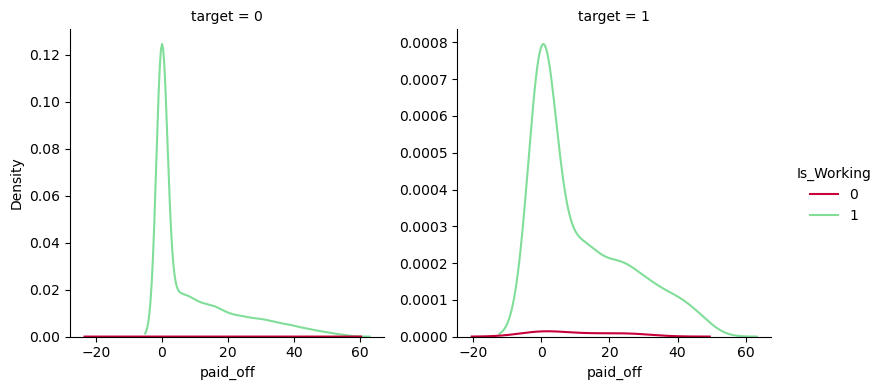

In [55]:
sns.displot(data=customer_apps_2, x='no_loan', hue="Is_Working", col='target', kind="kde", height=4, facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])
sns.displot(data=customer_apps_2, x='#_of_pastdues', hue="Is_Working", col='target', kind="kde", height=4, facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])
sns.displot(data=customer_apps_2, x='paid_off', hue="Is_Working", col='target', kind="kde", height=4, facet_kws={'sharey': False, 'sharex': False},palette=['#C70039','#80DE99'])

In [56]:
customer_apps_2.head()

,ID,Gender,Own_Car,Own_Realty,Income,Income_Type,Education,Family_Status,Housing_Type,Own_Work_Phone,...,Begin_month,Is_Working,In_Relationship,Household_size,Age,Experience,paid_off,#_of_pastdues,no_loan,target
0,5008806,0,1,1,112500.0,3,2,1,1,0,...,-29.0,1,1,2,59.0,3.106849,7,7,16,0
1,5008808,1,0,1,270000.0,2,2,2,1,0,...,-4.0,1,0,1,52.0,8.358904,0,2,3,0
2,5008809,1,0,1,270000.0,2,2,2,1,0,...,-26.0,1,0,1,52.0,8.358904,0,0,5,0
3,5008810,1,0,1,270000.0,2,2,2,1,0,...,-26.0,1,0,1,52.0,8.358904,15,6,6,0
4,5008811,1,0,1,270000.0,2,2,2,1,0,...,-38.0,1,0,1,52.0,8.358904,27,6,6,0


### Feature Selection 

__Information Gain__

The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.

In [58]:
def calc_iv(df, feature, target, pr=False):
    
    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()

    return iv, data

In [59]:
features = customer_apps_2.columns.tolist()[:-1]
iv_list = []
for feature in features:
    iv, data = calc_iv(customer_apps_2, feature, 'target')
    iv_list.append(round(iv,4))

woe_df = pd.DataFrame(np.column_stack([features, iv_list]), 
                      columns=['Feature', 'iv'])
woe_df

,Feature,iv
0,ID,0.0
1,Gender,0.0157
2,Own_Car,0.0003
3,Own_Realty,0.0159
4,Income,0.158
5,Income_Type,0.0053
6,Education,0.0187
7,Family_Status,0.0234
8,Housing_Type,0.0108
9,Own_Work_Phone,0.0038


__Feature Scaling__

In [65]:
X = customer_apps_2.drop('target', axis=1)
y = customer_apps_2['target'].astype('int')

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transformed_data = scaler.fit_transform(X)
X = pd.DataFrame(transformed_data, columns=X.columns)

In [78]:
y.value_counts()

0    27879
1      462
Name: target, dtype: int64

__Balancing the data using SMOTE__

In [79]:
X_balance,Y_balance = SMOTE().fit_resample(X,y)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

In [82]:
Y_balance.value_counts()

0    27879
1    27879
Name: target, dtype: int64

__RFE (Recursive Feature Elimination)__

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

cols = customer_apps_2.loc[:, customer_apps_2.columns != 'target'].columns.tolist()
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 15)
fit = rfe.fit(X_balance, Y_balance)
rfe_features = pd.DataFrame({"Feature":cols,
              "Support_LogisticRegression":fit.support_,
              "Feature_Rank_logisticRegression":fit.ranking_})
rfe_features

,Feature,Support_LogisticRegression,Feature_Rank_logisticRegression
0,ID,True,1
1,Gender,True,1
2,Own_Car,True,1
3,Own_Realty,False,3
4,Income,True,1
5,Income_Type,True,1
6,Education,True,1
7,Family_Status,False,8
8,Housing_Type,False,4
9,Own_Work_Phone,False,2


__ExtraTreesClassifier__

In [84]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_balance, Y_balance)
feature_importances = pd.DataFrame({"Feature":cols,
              "Feature_Importance_ExtratreeClassifier":model.feature_importances_})

In [85]:
#Now we will merge all importance scores from different feature selection methods
df1=pd.merge(woe_df, feature_importances, on=["Feature"])
feature_selection_df = pd.merge(df1, rfe_features, on=["Feature"])
feature_selection_df

,Feature,iv,Feature_Importance_ExtratreeClassifier,Support_LogisticRegression,Feature_Rank_logisticRegression
0,ID,0.0,0.051046,True,1
1,Gender,0.0157,0.047874,True,1
2,Own_Car,0.0003,0.040512,True,1
3,Own_Realty,0.0159,0.044967,False,3
4,Income,0.158,0.043915,True,1
5,Income_Type,0.0053,0.052894,True,1
6,Education,0.0187,0.034550,True,1
7,Family_Status,0.0234,0.020386,False,8
8,Housing_Type,0.0108,0.021521,False,4
9,Own_Work_Phone,0.0038,0.034876,False,2


In [88]:
#The following attributes were selected according to the table above.
selected_features = ["paid_off","Begin_month","#_of_pastdues","no_loan","Income","Experience",
                     "Education","Own_Realty",
                     "Family_Status","Household_size","Is_Working",
                     "Own_Car","Age"]

X_balance= X_balance[selected_features]

In [89]:
# Test train Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balance, Y_balance, random_state=100, test_size=0.3)
print(X_train.shape)

(39030, 13)


### Model Creation

__Logistic Regression__

In [97]:
# Importing Random search 
from sklearn.model_selection import RandomizedSearchCV
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
# Importing Stratified KFold
from sklearn.model_selection import StratifiedKFold

In [137]:
# Parameter initialization
log_reg_params = {'penalty': ['l2','l1'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None]
                  #'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                 }

In [99]:
# Randomized search Cv initialization
log_reg = LogisticRegression()
rand_logestic_reg = RandomizedSearchCV(log_reg, log_reg_params, n_iter=4)

In [146]:
def model_train(model_name, X_train, y_train, model_classifier):
    
    # printing model name
    print('********************************* Model : {} *********************************\n'.format(model_name.upper()))
    
    
    # Initializing empty lists
    accuracy_lst = []
    precision_lst = []
    recall_lst = []
    f1_lst = []
    auc_lst = []
    
    sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    i= 1
    for train_index, test_index in sss.split(X_train,y_train):
        #print('{} of KFold {}'.format(i,sss.n_splits))
        X_train_sm, X_test_sm = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_sm, y_test_sm = y_train.iloc[train_index], y_train.iloc[test_index]
        model_reg = model_classifier.fit(X_train_sm, y_train_sm)
        best_est_reg = model_reg.best_estimator_
        prediction_reg = best_est_reg.predict(X_train_sm)

#         # printing score
#         print('score: {:.4f}'.format(best_est_reg.score(X_train_sm, y_train_sm)))
#         print('precision_score: {:.4f}'.format(precision_score(y_train_sm, prediction_reg)))
#         print('recall_score: {:.4f}'.format(recall_score(y_train_sm, prediction_reg)))
#         print('f1_score: {:.4f}'.format(f1_score(y_train_sm, prediction_reg)))
#         print('roc_auc_score: {:.4f}'.format(roc_auc_score(y_train_sm, prediction_reg)))
#         print('---' * 35)

        accuracy_lst.append(best_est_reg.score(X_train_sm, y_train_sm))
        precision_lst.append(precision_score(y_train_sm, prediction_reg))
        recall_lst.append(recall_score(y_train_sm, prediction_reg))
        f1_lst.append(f1_score(y_train_sm, prediction_reg))
        auc_lst.append(roc_auc_score(y_train_sm, prediction_reg))
        i = i+1

    # printing mean score of all
    print('###' * 35)
    print('Overall Score summary on Train Data')
    print("accuracy_mean: {:.4f}".format(np.mean(accuracy_lst)))
    print("precision_mean: {:.4f}".format(np.mean(precision_lst)))
    print("recall_mean: {:.4f}".format(np.mean(recall_lst)))
    print("f1_score_mean: {:.4f}".format(np.mean(f1_lst)))
    print('\n')
    
    #Printing report
    print('\n Classification matrics of Test data\n')
    classification_report(best_est_reg, X_test_sm, y_test_sm)
    
    #Printing confusion matrics
    print('\n Confusion matrics of Test data\n')
    confusion_matrics(best_est_reg, X_test_sm, y_test_sm)
    
    #return statement
    return best_est_reg, X_test_sm, y_test_sm, X_train_sm, y_train_sm

In [130]:
# Printing the clasification Report 
def classification_report(best_est_model, X_test, y_test):
    from sklearn.metrics import classification_report

    label = ['Approved', 'Declined']
    pred_reg_sm = best_est_model.predict(X_test)
    print(classification_report(y_test, pred_reg_sm, target_names=label))

In [131]:
# Plotting Confusion Mtrics
def confusion_matrics(best_est_model, X_test, y_test):
    pred_reg_sm = best_est_model.predict(X_test)
    cm = confusion_matrix(y_test, pred_reg_sm) 
    
    f, ax = plt.subplots(1, 2, figsize=(20,8))

    sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%', ax = ax[0])
    ax[0].set_title('Percentage Matrics')
    ax[0].set_ylabel('Actual Values')
    ax[0].set_xlabel('Predicted Values ')
    
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',ax = ax[1])
    ax[1].set_title('Count Matrics')
    ax[1].set_ylabel('Actual Values')
    ax[1].set_xlabel('Predicted Values ')  

    plt.show()

********************************* Model : LOGISTIC REGRESSION *********************************

#########################################################################################################
Overall Score summary on Train Data
accuracy_mean: 0.7514
precision_mean: 0.7660
recall_mean: 0.7230
f1_score_mean: 0.7439



 Classification matrics of Test data

              precision    recall  f1-score   support

    Approved       0.74      0.79      0.77      3909
    Declined       0.77      0.73      0.75      3897

    accuracy                           0.76      7806
   macro avg       0.76      0.76      0.76      7806
weighted avg       0.76      0.76      0.76      7806


 Confusion matrics of Test data



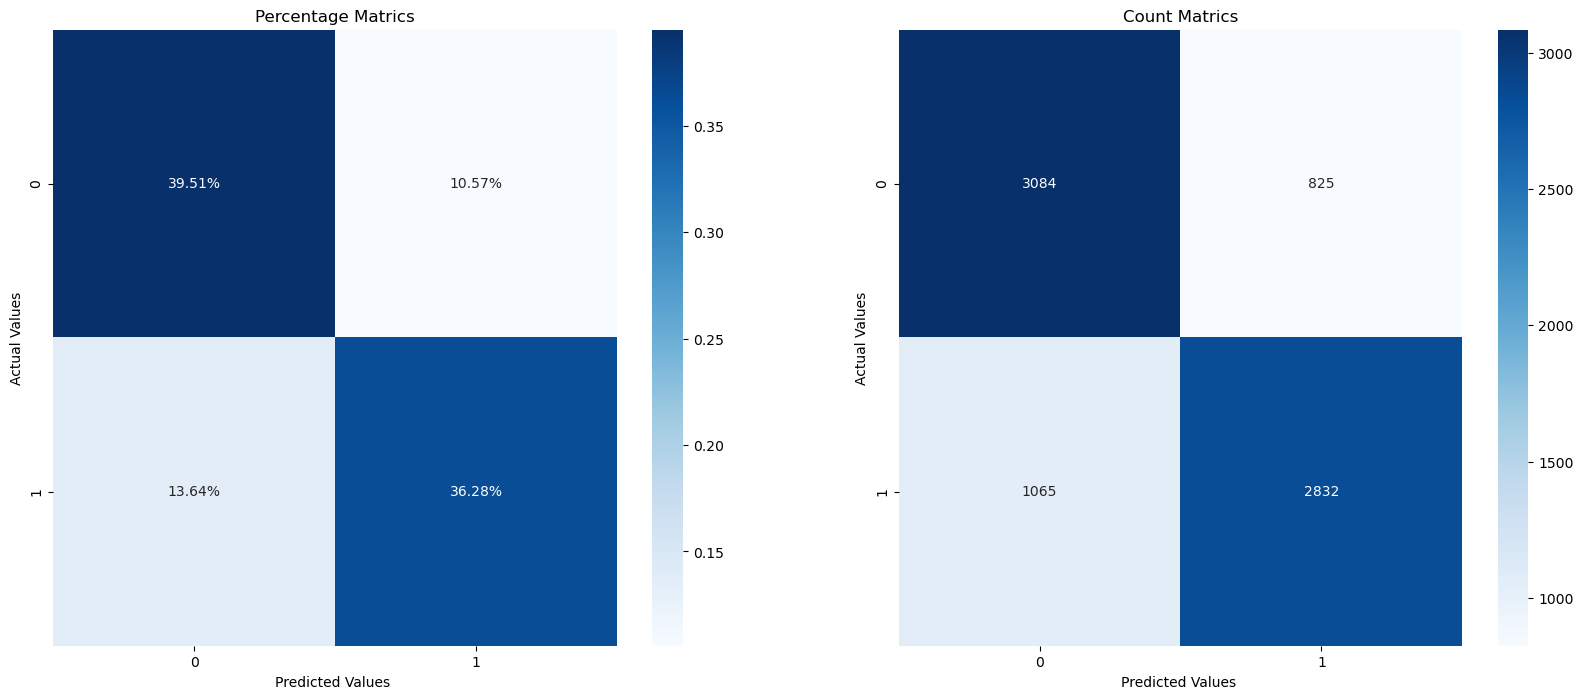

In [147]:
tuned_logistic_reg, X_test_sm, y_test_sm, X_train_sm, y_train_sm = model_train('Logistic Regression', X_train, y_train, rand_logestic_reg)

### Random Forest Classifier

In [149]:
# Importing important libraries
from sklearn.ensemble import RandomForestClassifier

In [150]:
# defining parameter values
rfc_params = {'max_features' : ['auto', 'sqrt', 'log2'],
              'random_state' : [42],
              'class_weight' : ['balanced','balanced_subsample'],
              'criterion' : ['gini', 'entropy'],
              'bootstrap' : [True,False]}

In [151]:
rfc_sm = RandomForestClassifier()
rand_forest = RandomizedSearchCV(rfc_sm, rfc_params, n_iter=4)

********************************* Model : RANDOM FOREST *********************************

#########################################################################################################
Overall Score summary on Train Data
accuracy_mean: 1.0000
precision_mean: 1.0000
recall_mean: 1.0000
f1_score_mean: 1.0000



 Classification matrics of Test data

              precision    recall  f1-score   support

    Approved       0.99      1.00      0.99      3909
    Declined       1.00      0.99      0.99      3897

    accuracy                           0.99      7806
   macro avg       0.99      0.99      0.99      7806
weighted avg       0.99      0.99      0.99      7806


 Confusion matrics of Test data



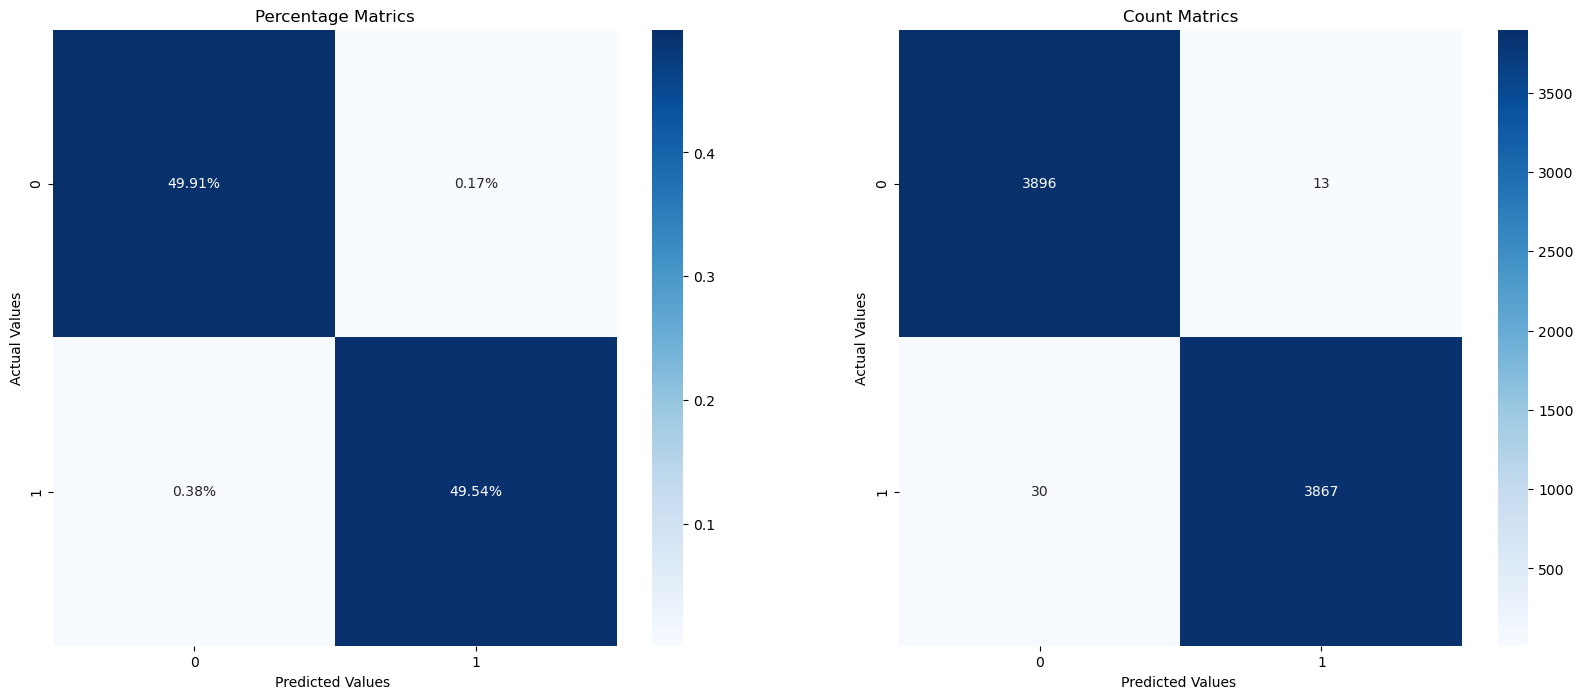

In [153]:
tuned_random_classifier, X_test_sm, y_test_sm, X_train_sm, y_train_sm = model_train('Random Forest', X_train, y_train, rand_forest)

### XGBoost

In [154]:
# Importing XGBoost classifier
import xgboost as xgb

In [155]:
# Defining parameter values
xgb_params = {'eta' : [0.1,0.01,0.001],  # Learning rate
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],      # L2 regularization (higher values make model more conservative)
              'alpha' : [0,0.5,1]}        # L1 regularization (higher values make model more conservative)

In [156]:
xgb_sm = xgb.XGBClassifier(random_state = 42)
rand_xgboost = RandomizedSearchCV(xgb_sm, xgb_params, n_iter=4)

********************************* Model : XGBOOST *********************************

#########################################################################################################
Overall Score summary on Train Data
accuracy_mean: 0.9764
precision_mean: 0.9716
recall_mean: 0.9819
f1_score_mean: 0.9767



 Classification matrics of Test data

              precision    recall  f1-score   support

    Approved       0.98      0.97      0.98      3909
    Declined       0.97      0.98      0.98      3897

    accuracy                           0.98      7806
   macro avg       0.98      0.98      0.98      7806
weighted avg       0.98      0.98      0.98      7806


 Confusion matrics of Test data



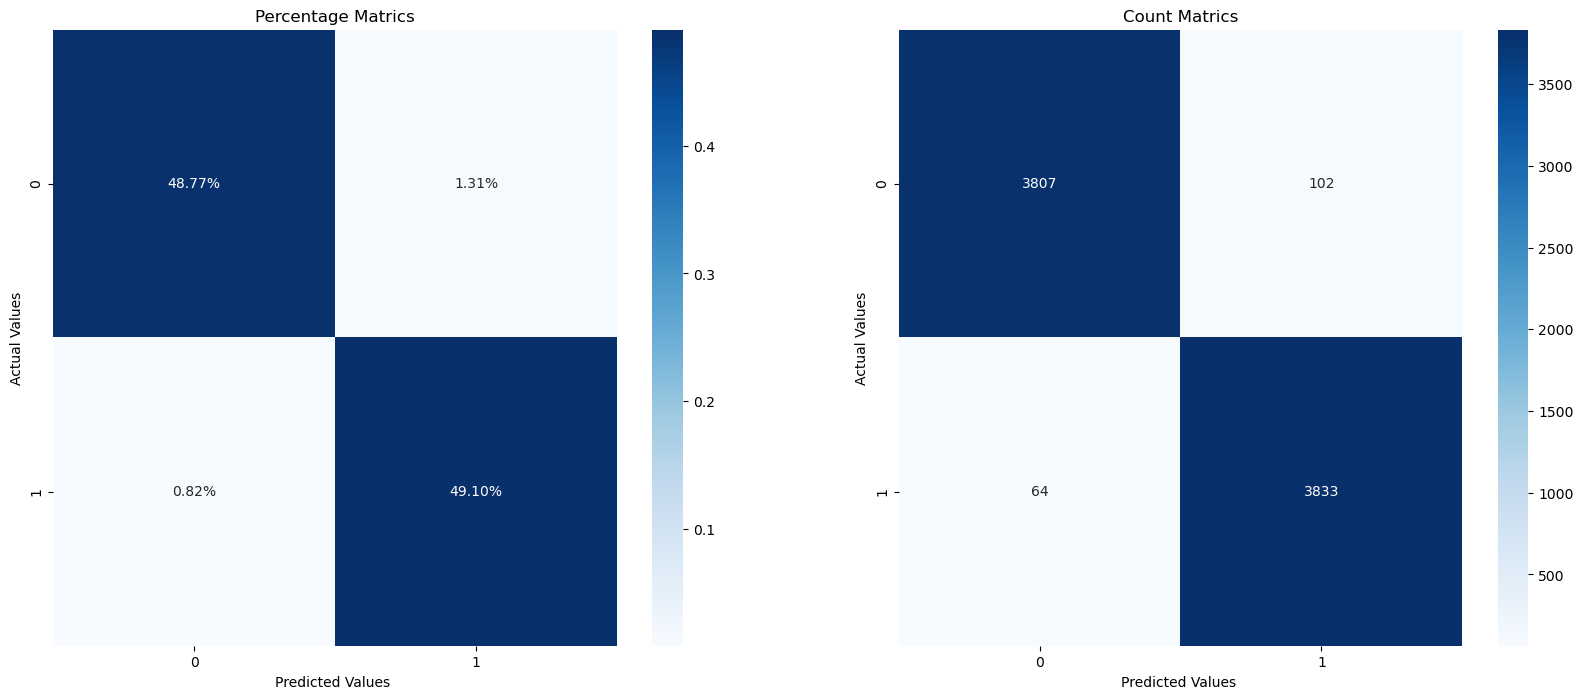

In [158]:
trained_xgboost, X_test_sm, y_test_sm, X_train_sm, y_train_sm = model_train('XGBOOST', X_train, y_train, rand_xgboost)

### CatBoost

In [159]:
# Importing catboost
from catboost import CatBoostClassifier

In [160]:
cat_params = {'eval_metric': ['F1'],
              'iterations': [100,500,1000],
              'learning_rate' : [0.1,0.01,0.001],
              'random_seed' : [42],
              'auto_class_weights' : ['Balanced','SqrtBalanced']
             }

In [161]:
cat_sm = CatBoostClassifier(verbose = 0)
rand_catboost = RandomizedSearchCV(cat_sm, cat_params, n_iter=4)

********************************* Model : CATBOOST *********************************

#########################################################################################################
Overall Score summary on Train Data
accuracy_mean: 0.9861
precision_mean: 0.9869
recall_mean: 0.9854
f1_score_mean: 0.9861



 Classification matrics of Test data

              precision    recall  f1-score   support

    Approved       0.99      1.00      0.99      3909
    Declined       1.00      0.99      0.99      3897

    accuracy                           0.99      7806
   macro avg       0.99      0.99      0.99      7806
weighted avg       0.99      0.99      0.99      7806


 Confusion matrics of Test data



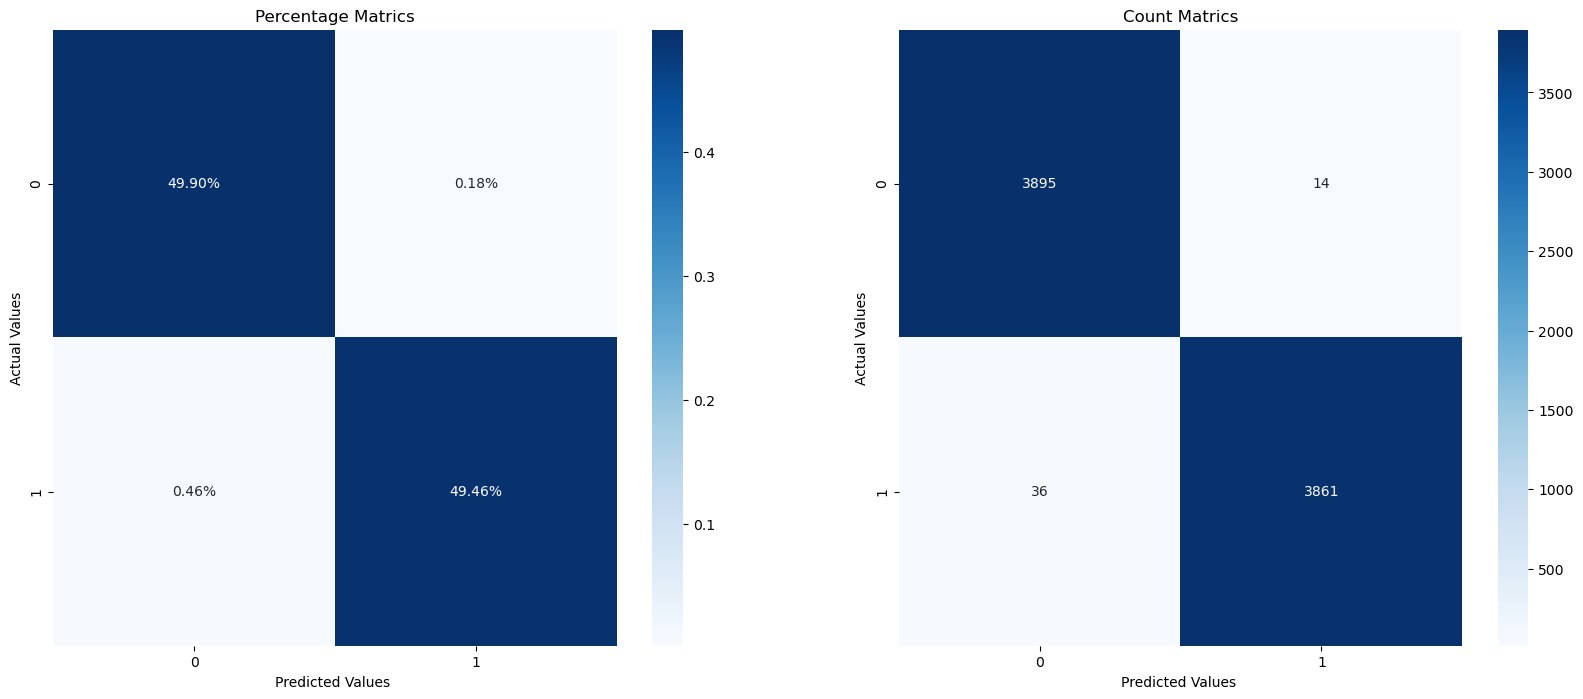

In [163]:
trained_catboost, X_test_sm, y_test_sm, X_train_sm, y_train_sm = model_train('CatBoost', X_train, y_train, rand_catboost)

### KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn = KNeighborsClassifier()
from sklearn.model_selection import RandomizedSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [166]:
# defining parameter range
rand_knn = RandomizedSearchCV(knn, param_grid, n_iter=4)

********************************* Model : KNN *********************************

#########################################################################################################
Overall Score summary on Train Data
accuracy_mean: 0.9658
precision_mean: 0.9389
recall_mean: 0.9982
f1_score_mean: 0.9673



 Classification matrics of Test data

              precision    recall  f1-score   support

    Approved       1.00      0.96      0.98      3909
    Declined       0.96      1.00      0.98      3897

    accuracy                           0.98      7806
   macro avg       0.98      0.98      0.98      7806
weighted avg       0.98      0.98      0.98      7806


 Confusion matrics of Test data



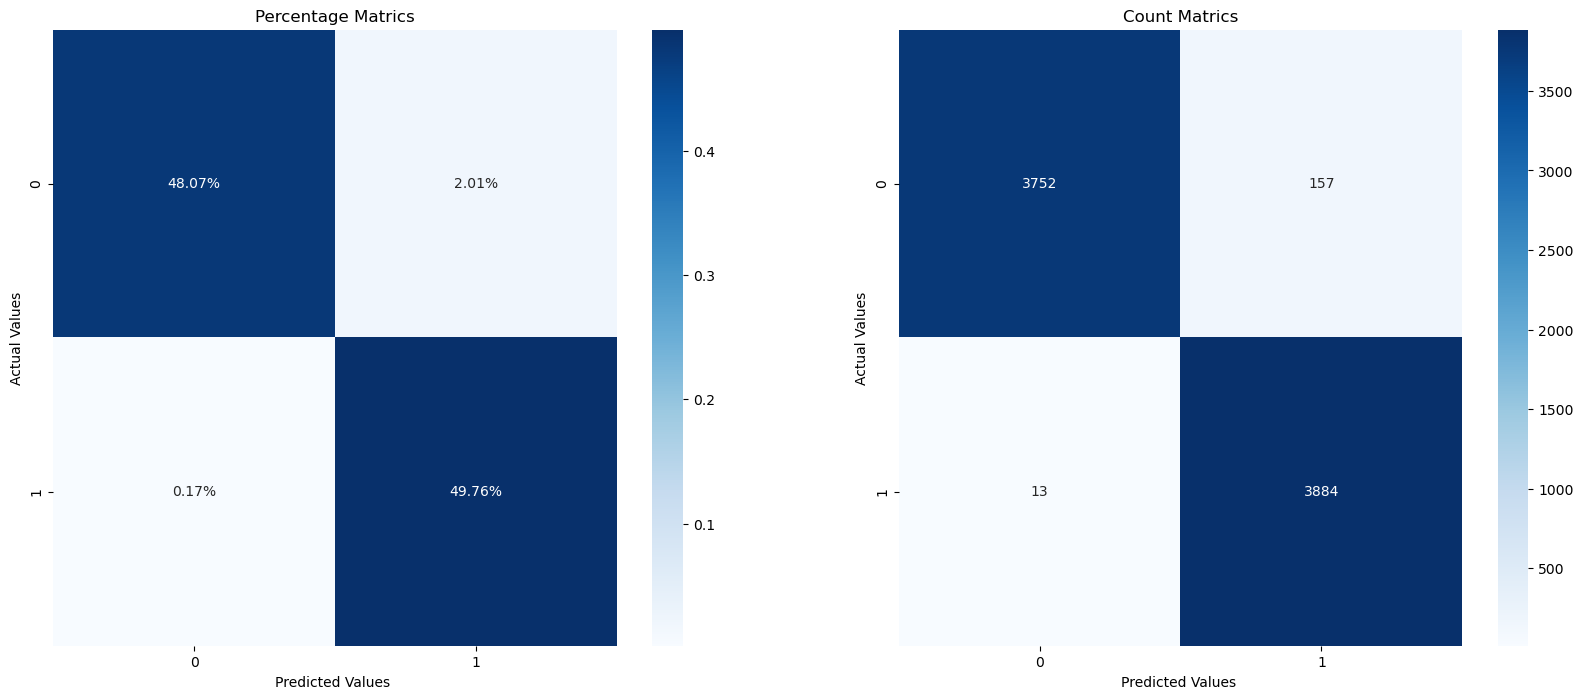

In [168]:
trained_rand_knn, X_test_sm, y_test_sm, X_train_sm, y_train_sm = model_train('KNN', X_train, y_train, rand_knn)

__Results__

In [209]:
y_pred_logistic = tuned_logistic_reg.predict(X_test)
y_pred_random = tuned_random_classifier.predict(X_test)
y_pred_xgboost = trained_xgboost.predict(X_test)
y_pred_catboost = trained_catboost.predict(X_test)
y_pred_knn = trained_rand_knn.predict(X_test)

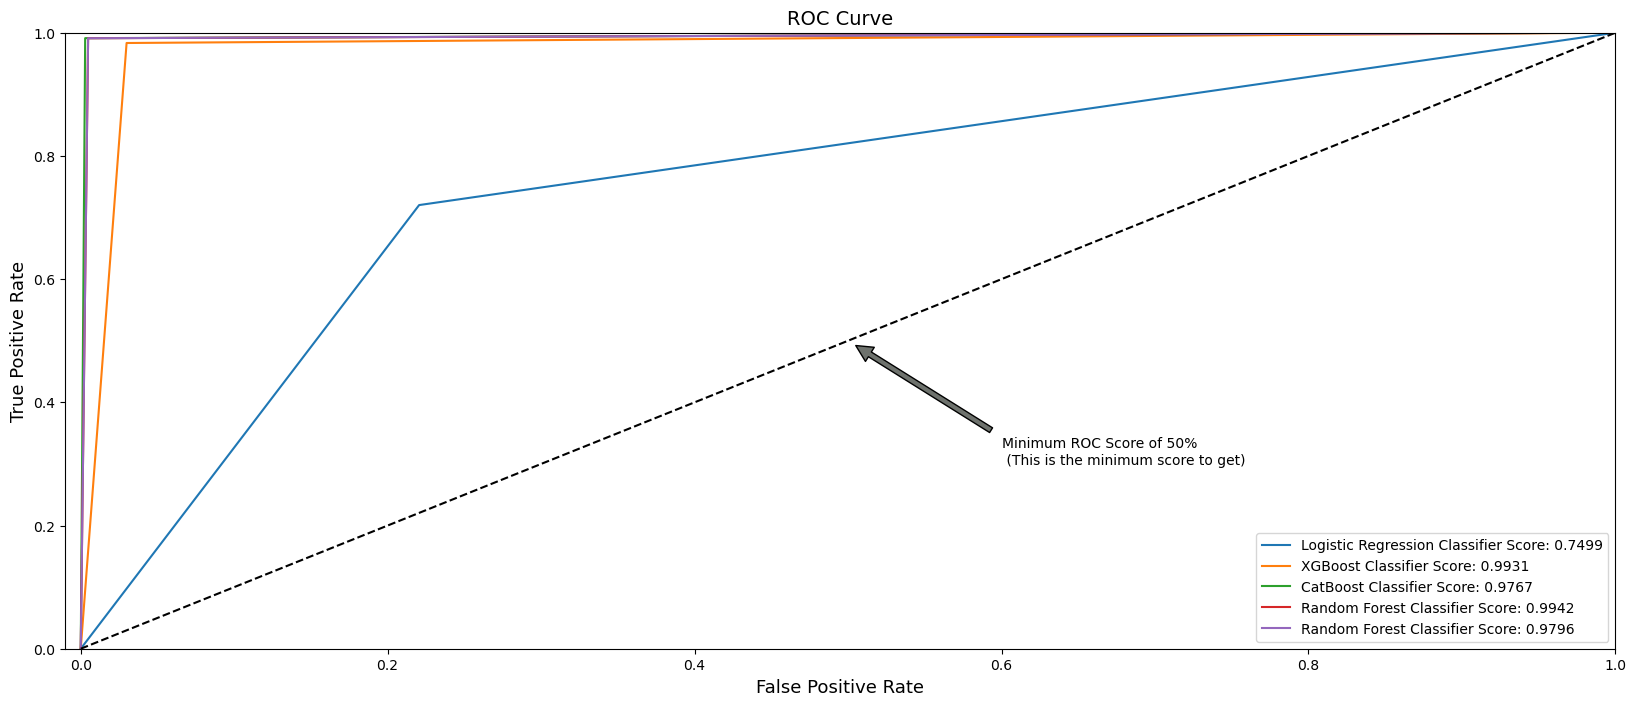

In [211]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred_logistic)
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test, y_pred_random)
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_test, y_pred_xgboost)
cat_fpr, cat_tpr, cat_thresold = roc_curve(y_test, y_pred_catboost)
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, y_pred_knn)

def graph_roc_curve_multiple(log_fpr, log_tpr, rfc_fpr, rfc_tpr,xgb_fpr, xgb_tpr,cat_fpr, cat_tpr, knn_fpr, knn_tpr):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_logistic)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_random)))
    plt.plot(cat_fpr, cat_tpr, label='CatBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_xgboost)))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_catboost)))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_knn)))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, rfc_fpr, rfc_tpr,xgb_fpr, xgb_tpr,cat_fpr, cat_tpr, knn_fpr, knn_tpr)
plt.show()
cm1 = confusion_matrix(y_test, y_pred_logistic) 
cm2 = confusion_matrix(y_test, y_pred_random) 
cm3 = confusion_matrix(y_test, y_pred_xgboost) 
cm4 = confusion_matrix(y_test, y_pred_catboost) 
cm5 = confusion_matrix(y_test, y_pred_knn) 

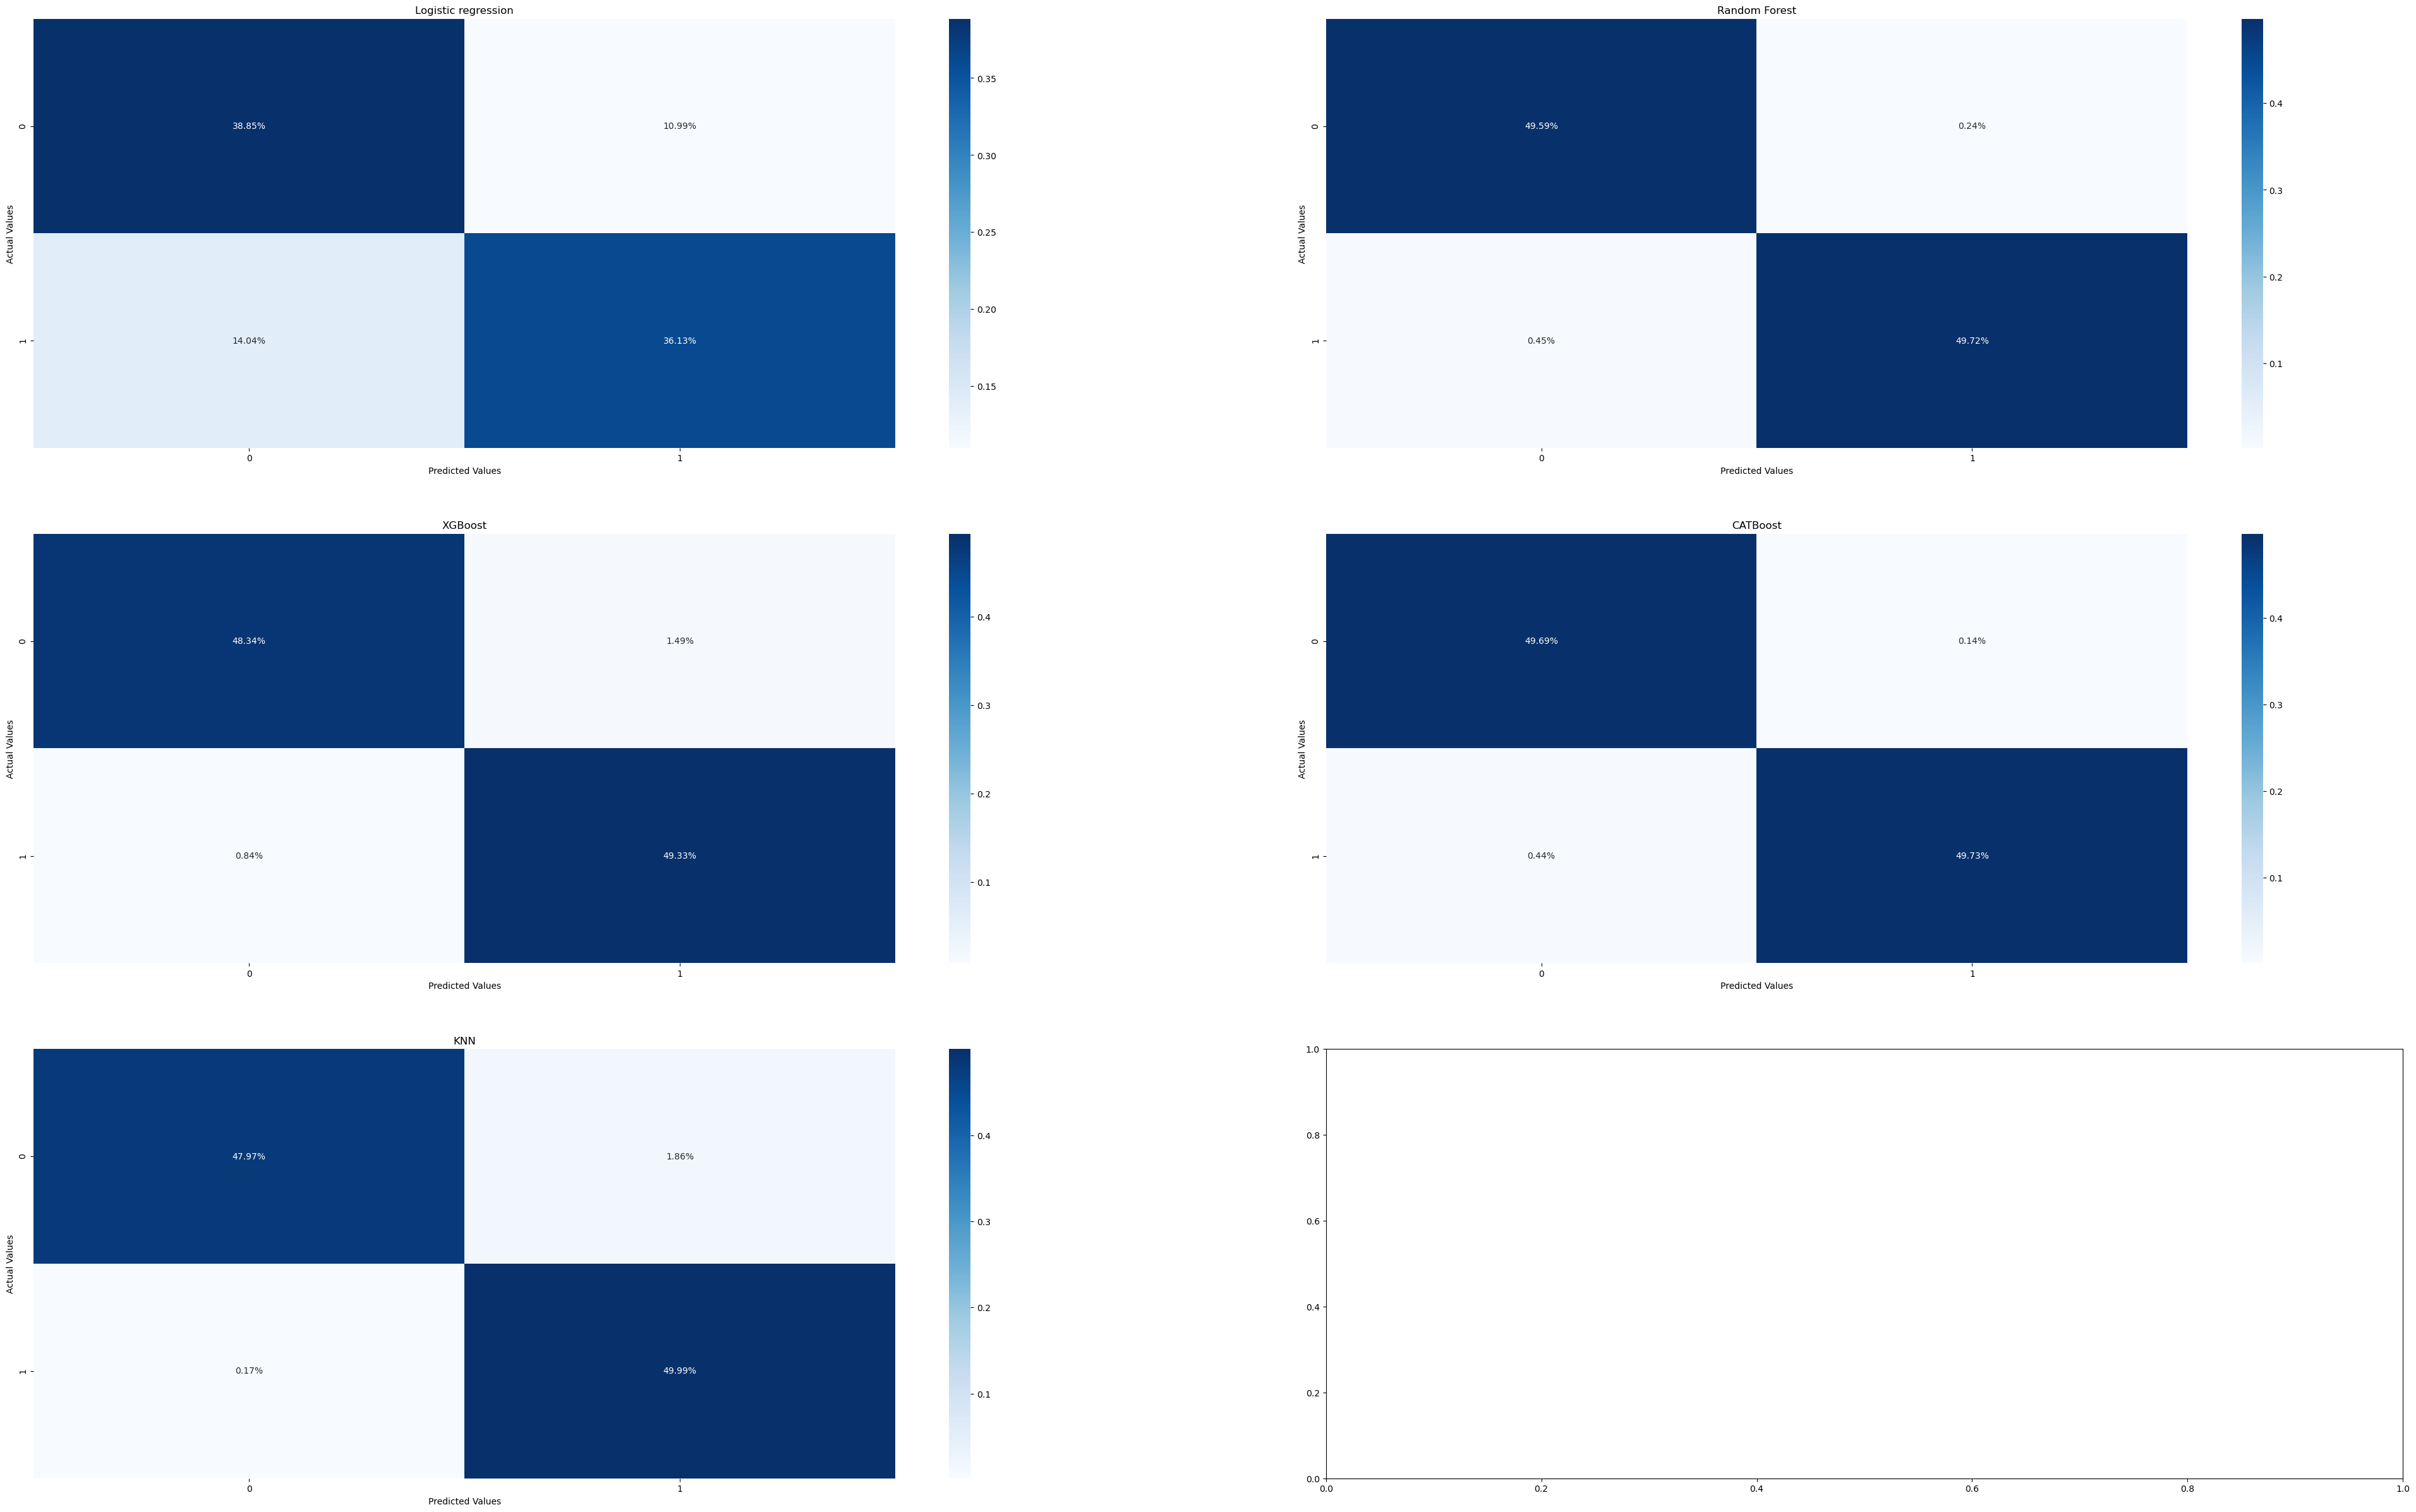

In [203]:
cm1 = confusion_matrix(y_test, y_pred_logistic) 
cm2 = confusion_matrix(y_test, y_pred_random) 
cm3 = confusion_matrix(y_test, y_pred_xgboost) 
cm4 = confusion_matrix(y_test, y_pred_catboost) 
cm5 = confusion_matrix(y_test, y_pred_knn) 

f, ax = plt.subplots(3, 2, figsize=(20,30))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(cm1/np.sum(cm1), annot=True, cmap='Blues', fmt='.2%', ax = ax[0][0])
ax[0][0].set_title('Logistic regression')
ax[0][0].set_ylabel('Actual Values')
ax[0][0].set_xlabel('Predicted Values')

sns.heatmap(cm2/np.sum(cm2), annot=True, cmap='Blues', fmt='.2%', ax = ax[0][1])
ax[0][1].set_title('Random Forest')
ax[0][1].set_ylabel('Actual Values')
ax[0][1].set_xlabel('Predicted Values')

sns.heatmap(cm3/np.sum(cm3), annot=True, cmap='Blues', fmt='.2%', ax = ax[1][0])
ax[1][0].set_title('XGBoost')
ax[1][0].set_ylabel('Actual Values')
ax[1][0].set_xlabel('Predicted Values')

sns.heatmap(cm4/np.sum(cm4), annot=True, cmap='Blues', fmt='.2%', ax = ax[1][1])
ax[1][1].set_title('CATBoost')
ax[1][1].set_ylabel('Actual Values')
ax[1][1].set_xlabel('Predicted Values')

sns.heatmap(cm5/np.sum(cm5), annot=True, cmap='Blues', fmt='.2%', ax = ax[2][0])
ax[2][0].set_title('KNN')
ax[2][0].set_ylabel('Actual Values')
ax[2][0].set_xlabel('Predicted Values')

plt.show()

In [208]:
print('Logistic Regression')
classification_report(tuned_logistic_reg, X_test, y_test)
print('\n random Forest')
classification_report(tuned_random_classifier, X_test, y_test)
print('\nXGBoost')
classification_report(trained_xgboost, X_test, y_test)
print('\nCatBoost')
classification_report(trained_catboost, X_test, y_test)
print('\nKNN')
classification_report(trained_rand_knn, X_test, y_test)

Logistic Regression
              precision    recall  f1-score   support

    Approved       0.73      0.78      0.76      8336
    Declined       0.77      0.72      0.74      8392

    accuracy                           0.75     16728
   macro avg       0.75      0.75      0.75     16728
weighted avg       0.75      0.75      0.75     16728


 random Forest
              precision    recall  f1-score   support

    Approved       0.99      1.00      0.99      8336
    Declined       1.00      0.99      0.99      8392

    accuracy                           0.99     16728
   macro avg       0.99      0.99      0.99     16728
weighted avg       0.99      0.99      0.99     16728


XGBoost
              precision    recall  f1-score   support

    Approved       0.98      0.97      0.98      8336
    Declined       0.97      0.98      0.98      8392

    accuracy                           0.98     16728
   macro avg       0.98      0.98      0.98     16728
weighted avg       0.98      

__Conclusion__

As per the above result random forest and CatBoost are having nearly same.
- Every wrongly classified customer is a finacial loss to the Bank 
- Recall score of Random forest: 0.45 & CatBoost: 0.44 which slightly different
- From execution perspective CatBoost is faster, Hence we are selectinf it as the final model.